In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pandas
import os
import seaborn as sns

import tissue.api as tissue

In [3]:
# user = "david.fischer"
# user = "ina"
user = "mayar.ali"

if user == "david.fischer":
    base_path_gcn = "/Users/david.fischer/phd/seafile/DavidFischer_notforFabian/tissue/grid_searches/metabric/"
    base_path_mi = "/Users/david.fischer/phd/seafile/DavidFischer_notforFabian/tissue/grid_searches/metabric/"
    base_path_reg = "/Users/david.fischer/phd/seafile/DavidFischer_notforFabian/tissue/grid_searches/metabric/"
elif user == "ina":
    base_path_gcn = '../../results/GCN/basel_zurich/'
    base_path_reg = '../../results/REG/basel_zurich/'
    
elif user == "mayar.ali":
    base_path_gcn = "/home/iterm/mayar.ali/phd/projects/tissue/grid_searches/refactor/metabric/"
    base_path_mi = "/home/iterm/mayar.ali/phd/projects/tissue/grid_searches/refactor/metabric/"
    base_path_reg = "/home/iterm/mayar.ali/phd/projects/tissue/grid_searches/refactor/metabric/"


# Overall

In [5]:
dir_figures="/lustre/groups/ml01/workspace/mayar.ali/tissue/figures/metabric/"

### Grade


In [4]:
source_path={
    
    "2205100927_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1": base_path_gcn,
    "2205122013_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1": base_path_gcn,
    "2205131048_GCN_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1": base_path_gcn,
    "2205030952_MI_NONE_GRADE_STANDARD_metabric_RADIUS": base_path_mi,
    "2205030953_REG_GRADE_STANDARD": base_path_mi,
    
    "2206090851_GCNSS_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1": base_path_gcn,
    "2206090850_GCN_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1": base_path_gcn,
    "22060852_MI_NONE_GRADE_TYPE_metabric_RADIUS": base_path_mi,
    "2206090854_REG_GRADE_TYPE": base_path_reg,


}
gs_ids=[
    "2205100927_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1",
    "2205122013_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1",
    "2205131048_GCN_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1",
    "2205030952_MI_NONE_GRADE_STANDARD_metabric_RADIUS",
    "2205030953_REG_GRADE_STANDARD",
    
    "2206090851_GCNSS_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1",
    "2206090850_GCN_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1",
    "22060852_MI_NONE_GRADE_TYPE_metabric_RADIUS",
    "2206090854_REG_GRADE_TYPE",
]

In [5]:
container = tissue.fits.GridSearchContainer(
    source_path=source_path,
    gs_ids=gs_ids
)
container.load_gs()

loaded 2205100927_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1: 72 runs with 6-fold cross validation
loaded 2205122013_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1: 72 runs with 6-fold cross validation
loaded 2205131048_GCN_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1: 72 runs with 6-fold cross validation
loaded 2205030952_MI_NONE_GRADE_STANDARD_metabric_RADIUS: 162 runs with 6-fold cross validation
loaded 2205030953_REG_GRADE_STANDARD: 72 runs with 6-fold cross validation
loaded 2206090851_GCNSS_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1: 4 runs with 6-fold cross validation
loaded 2206090850_GCN_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1: 4 runs with 6-fold cross validation
loaded 22060852_MI_NONE_GRADE_TYPE_metabric_RADIUS: 4 runs with 6-fold cross validation
loaded 2206090854_REG_GRADE_TYPE: 1 runs with 2-fold cross validation


In [6]:
sns.set_palette("gray_r")

selected ['model_class']
means=model_class
GCN      0.589411
GCNSS    0.615646
MI       0.599884
MLP      0.588001
Name: test_grade_custom_categorical_acc, dtype: float64
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MI_molecular v.s. MI_types: t-test independent samples, P_val=4.281e-05 stat=6.883e+00
MLP_molecular v.s. MLP_types: t-test independent samples, P_val=6.417e-01 stat=4.897e-01
GCN_molecular v.s. GCN_types: t-test independent samples, P_val=1.742e-03 stat=4.231e+00
GCNSS_molecular v.s. GCNSS_types: t-test independent samples, P_val=4.188e-05 stat=6.901e+00


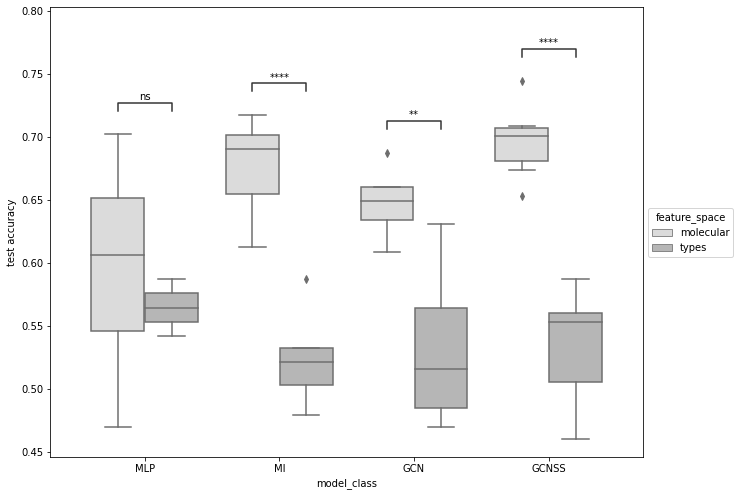

In [7]:
# t-test welch

### test chosen on train
group_name="grade"
container.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show=group_name + "_custom_categorical_acc",
    partition_select="train",
    metric_select=group_name + "_loss",
    cv_mode="mean",
    param_hue="feature_space",  #  feature_space, depth_feature_embedding
    param_x=['model_class'],
#     save=dir_figures+"supp4_refactored_test_on_train_types_molecular, 
    suffix=".pdf",
    panel_width = 10,
    panel_height = 7,
    show_swarm=False,
    feature_space=True,
    ttest = True,
)

#### cell types analysis

In [8]:
source_path={

    "2206090851_GCNSS_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1": base_path_gcn,
    "2206090850_GCN_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1": base_path_gcn,
    "22060852_MI_NONE_GRADE_TYPE_metabric_RADIUS": base_path_mi,
    "2206090854_REG_GRADE_TYPE": base_path_reg,


}
gs_ids=[

    
    "2206090851_GCNSS_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1",
    "2206090850_GCN_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1",
    "22060852_MI_NONE_GRADE_TYPE_metabric_RADIUS",
    "2206090854_REG_GRADE_TYPE",
]

In [9]:
container_typ = tissue.fits.GridSearchContainer(
    source_path=source_path,
    gs_ids=gs_ids,
)
container_typ.load_gs()


loaded 2206090851_GCNSS_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1: 4 runs with 6-fold cross validation
loaded 2206090850_GCN_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1: 4 runs with 6-fold cross validation
loaded 22060852_MI_NONE_GRADE_TYPE_metabric_RADIUS: 4 runs with 6-fold cross validation
loaded 2206090854_REG_GRADE_TYPE: 1 runs with 2-fold cross validation


selected ['model_class']
means=model_class
GCN      0.531034
GCNSS    0.534273
MI       0.523360
MLP      0.564312
Name: test_grade_custom_categorical_acc, dtype: float64
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MLP_types v.s. MI_types: t-test independent samples, P_val=2.159e-01 stat=1.383e+00
MI_types v.s. GCN_types: t-test independent samples, P_val=7.996e-01 stat=-2.607e-01
MI_types v.s. GCNSS_types: t-test independent samples, P_val=6.709e-01 stat=-4.377e-01


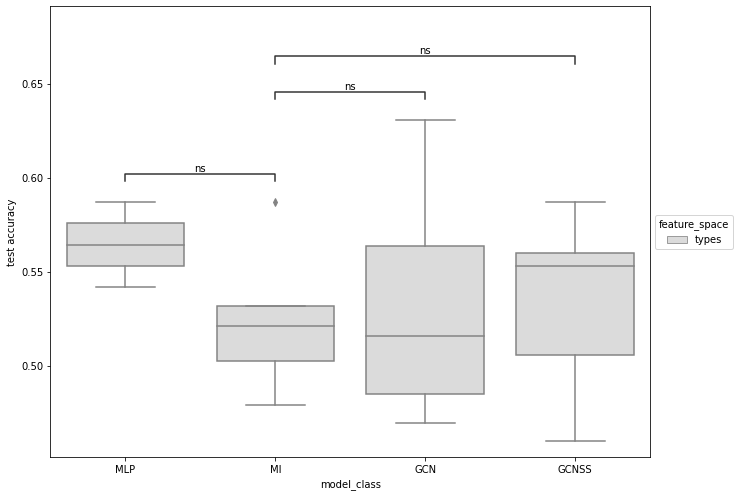

In [10]:
### test chosen on train
group_name="grade"
container_typ.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show=group_name + "_custom_categorical_acc",
    partition_select="train",
    metric_select=group_name + "_loss",
    cv_mode="mean",
    param_hue="feature_space",  #  feature_space, depth_feature_embedding
    param_x=['model_class'],
#     save=dir_figures+"supp4_refactored_test_on_train_types_ind", 
    suffix=".pdf",
    panel_width = 10,
    panel_height = 7,
    show_swarm=False,
    ttest = True,
    types = True,
)

In [11]:
import sklearn.metrics

In [12]:
sns.set_palette('colorblind')

/home/iterm/mayar.ali/phd/projects/tissue/tissue/train/summaries.py:1760: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  model_class = np.concatenate(np.array(model_class))
/home/iterm/mayar.ali/phd/projects/tissue/tissue/train/summaries.py:1761: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  grade = np.concatenate(np.array(grade))
/home/iterm/mayar.ali/phd/projects/tissue/tissue/train/summaries.py:1762: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different le

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MLP v.s. MI: t-test independent samples, P_val=6.766e-01 stat=4.227e-01
MI v.s. GCN: t-test independent samples, P_val=6.543e-01 stat=4.518e-01
MI v.s. GCNSS: t-test independent samples, P_val=9.967e-01 stat=-4.217e-03


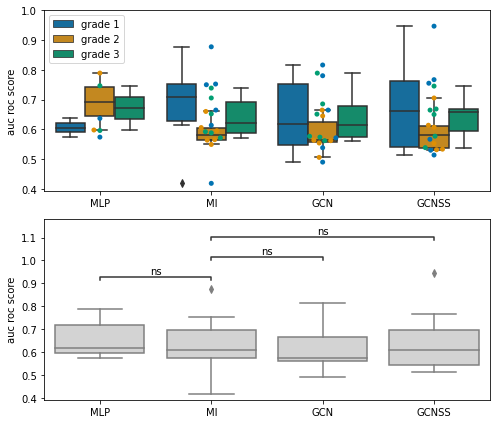

In [13]:
## test on train
group_name="grade"
container_typ.plot_best_model_roc_auc(
    partition_show="test",
#     metric_show=group_name + "_custom_categorical_acc",
    partition_select="train",
    metric_select=group_name + "_loss",
    cv_mode="mean",
    suffix=".pdf",
    panel_width = 7,
    panel_height = 6,
    ttest=True,
    plot_all_groups=True,
#     save=dir_figures+"supp4_refactored_test_on_train_typ_all_groups_mean_auc"
)

#### GCN SS

In [14]:
container_gcnss = tissue.fits.GridSearchContainer(
    source_path={
        "2206090851_GCNSS_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1": base_path_gcn,
    },
    gs_ids=[
        "2206090851_GCNSS_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1",
        
    ]
)
container_gcnss.load_gs()

loaded 2206090851_GCNSS_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1: 4 runs with 6-fold cross validation


In [15]:
gs_id, model_id, cv = container_gcnss.get_best_model_id(partition_select='train') ## CHANGED from VAL
container_gcnss.get_info(gs_id = gs_id, model_id=model_id)

In [16]:
sns.set_palette("colorblind")

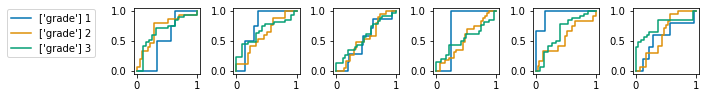

In [17]:
container_gcnss.plot_roc(partition='test')#, save=dir_figures+"supp4_test_roc_on_train_typ.pdf")

In [18]:
interpreter = tissue.fits.InterpreterGraph(results_path=base_path_gcn + gs_id + "/results/", cv=cv, model_id=model_id, model_class="GCNSS")
interpreter.load_model()
#     source_path,
#     gs_ids,
#     partition_select='test',
#     load_labels=['grade']
# )
data_path="/storage/groups/ml01/workspace/mayar.ali/tissue/data/metabric/"
buffered_data_path="/storage/groups/ml01/workspace/mayar.ali/tissue/data/metabric/"
interpreter.get_data_again(
    data_path=data_path,
)

2022-08-19 15:06:07.138009: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


/storage/groups/ml01/workspace/mayar.ali/tissue/data/metabric/refactored/buffer//buffered_data_20_fine.pickle
Loading data from buffer
Loaded 500 images with complete data from 467 patients over 477856 cells with 39 cell features and 9 distinct celltypes.
Dropped 13 images with missing relevant target labels


/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l


Whole dataset: 487 images from 441 patients.
Test dataset: 47 images from 44 patients.
Training dataset: 393 images from 357 patients.
Validation dataset: 47 images from 40 patients.



In [19]:
preds = np.argmax(container_gcnss.info[interpreter.cv]['predictions']['train']['grade'], axis=1)
true = np.argmax(container_gcnss.true_labels[interpreter.cv]['train']['grade'], axis=1)
acc = preds == true

idx = interpreter.img_keys_train
degrees = [np.mean(interpreter.data.img_celldata[image_key].obsp['adjacency_matrix_connectivities'].sum(axis=1))
            for image_key in idx]

In [20]:
nodes_sorted = np.sort(degrees)
order = np.argsort(degrees)
acc_sorted = np.array(acc)[order]
true_sorted = np.array(true)[order]

In [21]:
sns.set_palette("colorblind")

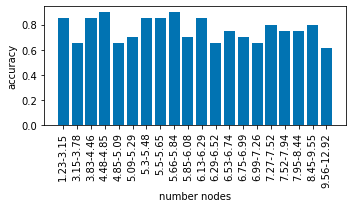

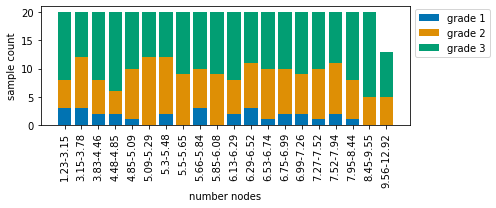

In [22]:
size = 20
accs = []
labels = []
plt.figure(figsize=(5,3))
a = []
b = []
c = []
for i in range(len(order)//size):
    accs.append(np.mean(acc_sorted[i*size:(i+1)*size]))
    labels.append(str(np.round(nodes_sorted[i*size], 2)) + '-' + str(np.round(nodes_sorted[(i+1)*size-1],2)))
    a.append(np.sum(true_sorted[i*size:(i+1)*size] == 0))
    b.append(np.sum(true_sorted[i*size:(i+1)*size] == 1))
    c.append(np.sum(true_sorted[i*size:(i+1)*size] == 2))
accs.append(np.mean(acc_sorted[len(order)//size*size:]))
labels.append(str(np.round(nodes_sorted[len(order)//size*size],2)) + '-' + str(np.round(nodes_sorted[-1], 2)))
a.append(np.sum(true_sorted[len(order)//size*size:] == 0))
b.append(np.sum(true_sorted[len(order)//size*size:] == 1))
c.append(np.sum(true_sorted[len(order)//size*size:] == 2))
plt.bar(height=accs, x=np.arange(len(accs)))
plt.xticks(np.arange(len(accs)), labels, rotation=90)
plt.xlabel('number nodes')
plt.ylabel('accuracy')
plt.tight_layout()
# plt.savefig(dir_figures + 'supp_acc_nr_nodes_val_typ.pdf')
plt.show()
# if save is not None:
#     plt.tight_layout()
#     plt.savefig(save + '_acc_nr_nodes.pdf')
    
plt.figure(figsize=(7,3))
plt.bar(x=np.arange(len(accs)), height=a, label='grade 1')
plt.bar(x=np.arange(len(accs)), height=b, bottom=a, label='grade 2')
plt.bar(x=np.arange(len(accs)), height=c, bottom=np.array(a) + np.array(b), label='grade 3')
plt.legend(bbox_to_anchor=(1.0, 1.02))
plt.xlabel('number nodes')
plt.ylabel('sample count')
plt.xticks(np.arange(len(accs)), labels, rotation=90)
plt.tight_layout()
# plt.savefig(dir_figures + 'supp_nr_nodes_val_typ.pdf')
plt.show()
# if save is not None:
#     plt.tight_layout()


In [23]:
gs_id, model_id, cv = container_gcnss.get_best_model_id(partition_select='train')
container_gcnss.get_info(gs_id = gs_id, model_id=model_id)

/home/iterm/mayar.ali/phd/projects/tissue/tissue/interpretation/interpreter.py:942: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['', 'grade 1', 'grade 2', 'grade 3'])


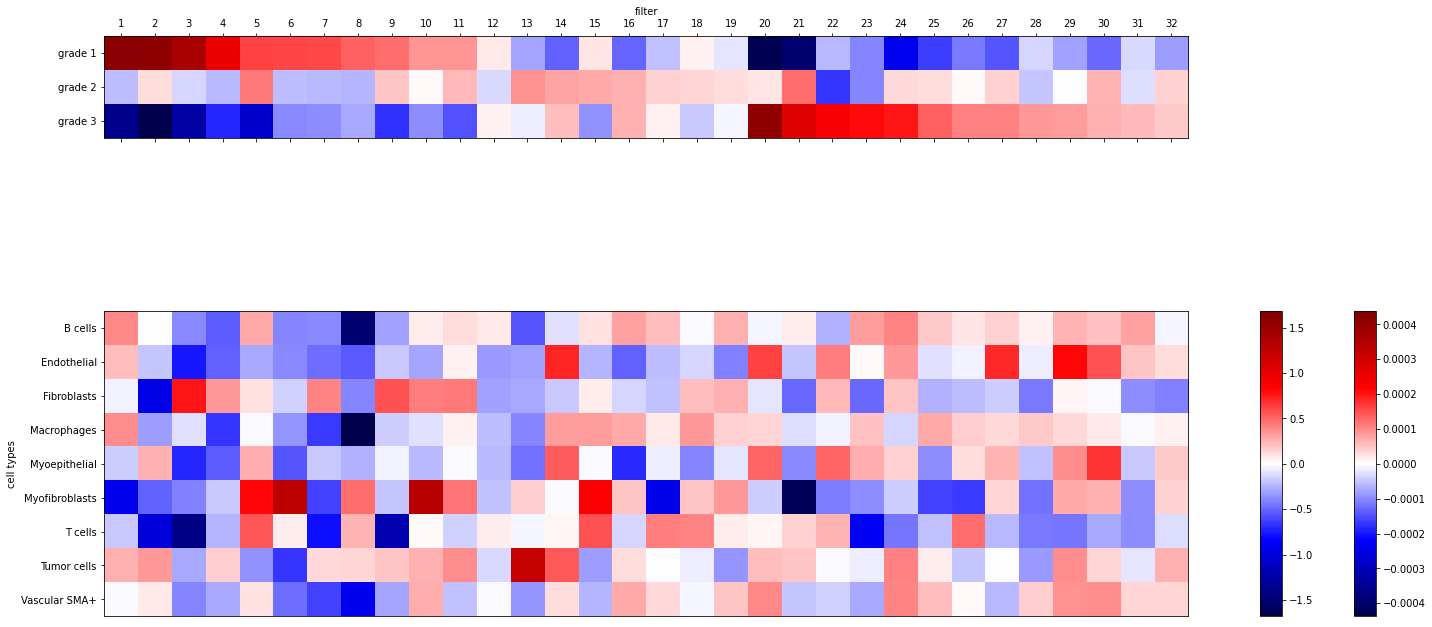

In [27]:
interpreter.plot_weight_matrix(
    layer_name='Layer_gcn_0', 
    target_label='grade',
    panel_width=20,
    panel_height=20,
#     save=dir_figures+"supp_std_filters_typ_refactored", 
)


In [28]:
sns.set_palette('colorblind')

Confusion matrix on test set:


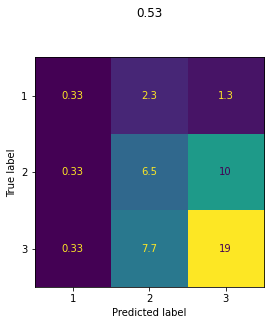

Confusion matrix on val set:


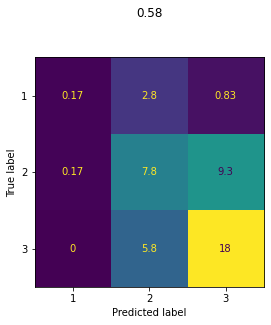

Confusion matrix on train set:


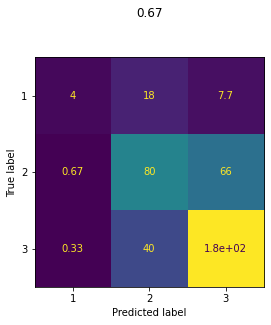

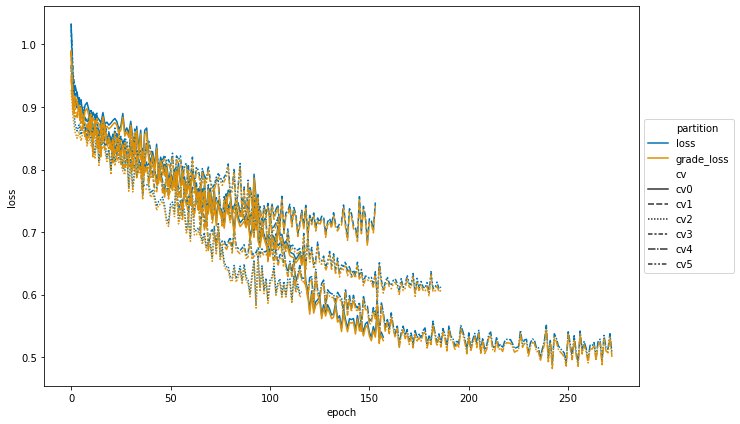


test
Grade 1 : 0.1111111111111111
Grade 2 : 0.39191643858153485
Grade 3 : 0.7054325890829514
mean : 0.5342725698049803

val
Grade 1 : 0.03333333333333333
Grade 2 : 0.4560228184841188
Grade 3 : 0.7513244471577805
mean : 0.5771108165897659

train
Grade 1 : 0.13282041774811518
Grade 2 : 0.5437681616755085
Grade 3 : 0.8172868209042599
mean : 0.6655781082206981


In [29]:
print('Confusion matrix on test set:')
container_gcnss.plot_confusion_matrix(
    target_label='grade',
    partition_show='test',
    mean_across_cv=True,
#     save=dir_figures+"supp_conf_test_typ_refactored_on_train", 
    x_ticks=['1', '2', '3'],
)

print('Confusion matrix on val set:')
container_gcnss.plot_confusion_matrix(
    target_label='grade',
    partition_show='val',
    mean_across_cv=True,
#     save=dir_figures+"supp_conf_val_typ_refactored_on_train",
#     save=save,
    x_ticks=['1', '2', '3'],
)

print('Confusion matrix on train set:')
container_gcnss.plot_confusion_matrix(
    target_label='grade',
    partition_show='train',
    mean_across_cv=True,
#     save=dir_figures+"supp_conf_train_typ_refactored_on_train",
#     save=save,
    x_ticks=['1', '2', '3']
)

container_gcnss.plot_training_history(
    plot_metrics=['loss', 'grade_loss'],
#     save=dir_figures+"supp_typ_history_refactored_on_train",
#     save=save,
)


for partition in ['test', 'val','train']:
    print()
    print(partition)
    mean = []
    for grade in [0, 1, 2]:
        acc = []
        for cv in ['cv0', 'cv1', 'cv2', 'cv3', 'cv4', 'cv5']:
            preds = np.argmax(container_gcnss.info[cv]['predictions'][partition]['grade'], axis=1)
            true = np.argmax(container_gcnss.true_labels[cv][partition]['grade'], axis=1)
            acc.append(np.mean(preds[true==grade] == true[true==grade]))
            if grade == 0:
                mean.append(np.mean(preds == true))
        mean_acc = np.mean(acc)
        print("Grade", grade+1, ":", mean_acc)
    mean = np.mean(mean)
    print("mean :", mean)